# The Lotka-Volterra equations

(Exercise 8.2 from *Computational Physics* by Mark Newman, [ISBN-10: 1480145513](https://www.amazon.ca/dp/1480145513/))

The Lotka-Volterra equations are a
mathematical model of predator--prey interactions between biological
species.  Let two variables $x$ and $y$ be proportional to the size of the
populations of two species, traditionally called *rabbits* (the
prey) and *foxes* (the predators).  You could think of $x$ and $y$ as
being the population in thousands, say, so that $x=2$ means there are 2000
rabbits.  Strictly the only allowed values of $x$ and~$y$ would then be
multiples of 0.001, since you can only have whole numbers of rabbits or
foxes.  But 0.001 is a pretty close spacing of values, so it's a decent
approximation to treat $x$ and $y$ as continuous real numbers so long as
neither gets very close to zero.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional
to their population, but are eaten by the foxes at a rate proportional to
both their own population and the population of foxes:
$$
\frac{dx}{dt} = \alpha x - \beta xy,
$$
where $\alpha$ and $\beta$ are constants.  At the same time the foxes
reproduce at a rate proportional the rate at which they eat
rabbits -- because they need food to grow and reproduce -- but also die of
old age at a rate proportional to their own population:
$$
\frac{dy}{dt} = \gamma xy - \delta y,
$$
where $\gamma$ and $\delta$ are also constants.




In [2]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

############################ constants
alpha, beta, gamma, delta = 1.0, 0.5, 0.5, 2.0  # parameters
x0 = y0 = 2                # initial conditions
T = 30.0                   # final time
N = 1000                   # number of time steps
############################ calculated constants
dt = T / N                 # time step
t = np.arange( 0, T, dt )  # times, $t_i, i=0...N-1$

### (a)
Write a program to solve these equations using ~~the fourth-order Runge--Kutta method~~ `scipy.integrate.odeint()` for the case $\alpha=1$, $\beta=\gamma=0.5$, and $\delta=2$, starting from the initial condition $x=y=2$.  Have the program make a graph showing both $x$ and $y$ as a function of time on the same axes from $t=0$ to $t=30$.  
  
~~(Hint: Notice that the differential equations in this case do not depend explicitly on time~$t$---in vector notation, the right-hand side of each equation is a function $f(\vec{r})$ with no $t$ dependence.  You may nonetheless find it convenient to define a Python function `f(r,t)` including the time variable, so that your program takes the same form as programs given earlier in this chapter. You don't have to do it that way, but it can avoid some confusion. Several of the following exercises have a similar lack of explicit time-dependence.)~~

(**Hint**: Create a function, `psiDot( psi, t )`, which accepts the current time and state vector, `t` and `psi`, and returns the time-derivative of the state vector.)

**FYI**: So far I have been including the plot commands in the solution boxes. I plan **not** doing this soon. Please make sure that you know what these commands do and are able to implement them yourself in the future.

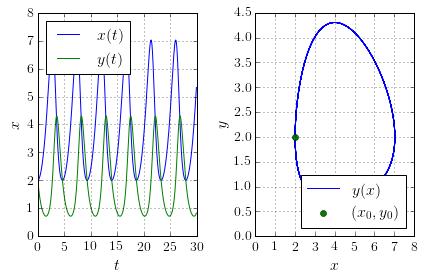

In [6]:
################################# time derivative of the state vector
def psidot( psi, t ) :          # returns $\dot{\vec{\psi}}$
    x,y = psi
    xdot = alpha*x - beta*x*y
    ydot = gamma*x*y - delta*y
    psidot = np.array([xdot,ydot])
    return psidot

fig = plt.figure()
ax1 = fig.add_subplot( 1, 2, 1 )  # for $x(t)$ and $y(t)$
ax2 = fig.add_subplot( 1, 2, 2 )  # for $y(x)$

# calculate
psi0 = x0,y0
x, y = odeint(psidot,psi0,t).T

# plot
ax1.plot( t, x,  label='$x(t)$' )
ax1.plot( t, y,  label='$y(t)$' )

ax2.plot( x, y,  label='$y(x)$' )
ax2.plot( x0, y0, 'o', label='$(x_0,y_0)$' ) # plot the initial position

# make it pretty
ax1.set_xlabel( '$t$' )
ax1.set_ylabel( '$x$' )
ax1.grid( 'on' )
ax1.legend( loc=2 )

ax2.set_xlabel( '$x$' )
ax2.set_ylabel( '$y$' )
ax2.grid( 'on' )
ax2.legend( loc=4, numpoints = 1 )
ax2.set_xbound( lower=0 )
ax2.set_ybound( lower=0 )

fig.tight_layout()


### (b)

Describe in words what is going on in the system, in terms of rabbits
  and foxes.

Both $x(t)$ and $y(t)$ are periodic and the phase of the predators, $y$, lags that of the prey, $x$.

### (c)

Create a function, `rk4( psi, psi0, t )`, which implements the fourth-order Runge--Kutta method given by the algorithm:
\begin{align}
&
y_0 = y_\text{initial}
\\&
t_0 = 0
\\&
\text{for } i \text{ in } N
\\&\quad
    k_1 = f(t_n, y_n),
\\&\quad
    k_2 = f\left(t_n + \frac{h}{2}, y_n + h\frac{k_1}{2}\right),
\\&\quad
    k_3 = f\left(t_n + \frac{h}{2}, y_n + h\frac{k_2}{2}\right), 
\\&\quad
    k_4 = f\left(t_n + h, y_n + hk_3\right)
\\&\quad
    y_{n+1} = y_n + \tfrac{h}{6}\left(k_1 + 2k_2 + 2k_3 + k_4 \right),
\\&\quad
    t_{n+1} = t_n + h
\end{align}
which is a drop-in replacement for `scipy.integrate.odeint()` (ie, it accepts the same arguments and returns the same array).

Do **not** use `append` in your function; instead allocate an array full of zeros using

    psit = np.zeros( [ len(t), len( psi0 ) ] )
    
Make sure that your function will work when `psi0` is a 1D array.

In [15]:
def rk4( psidot, psi0, t ) :
    psit = np.zeros( [ len(t), len( psi0 ) ] )
    x0,y0 = psi0
    psit[0] = x0,y0
    h = dt
    for i in range(N-1):
        k1 = psidot(psit[i],t[i])
        k2 = psidot(psit[i] + h*k1/2, t[i] + h/2)
        k3 = psidot(psit[i] + h*k2/2, t[i] + h/2)
        k4 = psidot(psit[i] + h*k3, t[i] + h)
        
        psit[i+1] = psit[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
        t[i+1] = t[i] + h
    # perform some calculations here
    return psit


### (d)

Re-do part (a) using `rk4()`. Use the same `psiDot()` from part (a).

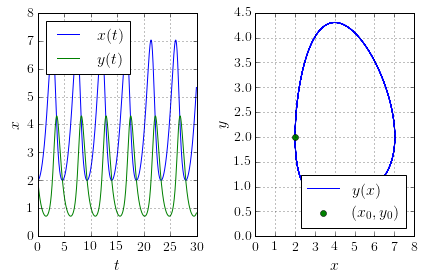

In [18]:
x,y = rk4(psidot,psi0,t).T


fig2 = plt.figure()
ax1 = fig2.add_subplot( 1, 2, 1 )  # for $x(t)$ and $y(t)$
ax2 = fig2.add_subplot( 1, 2, 2 )  # for $y(x)$

# plot
ax1.plot( t, x,  label='$x(t)$' )
ax1.plot( t, y,  label='$y(t)$' )

ax2.plot( x, y,  label='$y(x)$' )
ax2.plot( x0, y0, 'o', label='$(x_0,y_0)$' ) # plot the initial position

# make it pretty
ax1.set_xlabel( '$t$' )
ax1.set_ylabel( '$x$' )
ax1.grid( 'on' )
ax1.legend( loc=2 )

ax2.set_xlabel( '$x$' )
ax2.set_ylabel( '$y$' )
ax2.grid( 'on' )
ax2.legend( loc=4, numpoints = 1 )
ax2.set_xbound( lower=0 )
ax2.set_ybound( lower=0 )

fig2.tight_layout()